<a href="https://colab.research.google.com/github/GokulEpiphany/thesis_temp/blob/main/Group_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import fastai
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
!pip install fastai --upgrade

In [3]:
from fastai.tabular.all import *


In [4]:
import pandas as pd

In [7]:
df = pd.read_csv('final_data_thesis.csv',header=0)

In [ ]:
#Goal is to build 2 group classifier and check feature importance for each.

In [8]:
df.head()

,AGE,GENDER,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,RWT,PASP,PAH,CONC,MR,AR,TR,PR,PE,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,SYSTOLE,DIASTOLE,HR,DOE I - II,DOE III - IV,FEVER,COLD & COUGH,SORETHROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDMA,sST2,GROUP
0,1,M,3.2,2.5,4.6,3.0,1.1,1.2,0.8,1.0,65,35,44,62,18,0.59,36,MILD,NO,MILD,NIL,MILD,NIL,NIL,400,13,0.0,12.3,12.5,256000,53.6,4.3,0.0,23.6,7.1,141,4.1,120,70,112,NO,YES,YES,YES,YES,NO,NO,YES,NO,NO,14.0,GROUP I (PHARYNGITIS)
1,10,M,3.0,2.5,4.4,2.4,1.0,1.3,1.0,1.5,63,33,67,89,21,0.45,34,NIL,NO,NIL,TRIVIAL,TRIVIAL,NIL,NIL,400,19,0.0,12.7,12.9,265000,43.5,1.3,0.9,26.0,2.5,139,3.5,120,60,65,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,6.5,GROUP I (PHARYNGITIS)
2,4,M,3.4,2.7,4.3,2.8,1.0,1.1,1.1,1.2,63,33,54,52,19,0.47,34,NIL,NO,TRIVIAL,NIL,NIL,NIL,NIL,0,55,11.0,13.5,12.0,365000,58.9,1.0,0.3,21.0,5.0,140,3.5,130,70,61,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,3.6,GROUP I (PHARYNGITIS)
3,11,M,3.1,2.4,3.5,2.4,1.0,1.2,1.0,1.2,60,30,33,52,19,0.57,42,MILD,NO,NIL,NIL,TRIVIAL,NIL,NIL,800,33,0.0,13.2,13.0,345000,52.6,2.8,1.0,20.0,6.3,136,4.0,120,80,58,NO,YES,YES,NO,YES,NO,NO,YES,NO,NO,15.2,GROUP I (PHARYNGITIS)
4,27,M,3.6,2.9,4.2,3.4,1.1,1.3,1.0,1.1,58,29,60,106,46,0.52,37,MILD,NO,MILD,NIL,MILD,NIL,NIL,400,20,0.0,12.9,13.4,296000,60.0,1.0,0.6,41.6,4.3,140,3.5,120,70,109,NO,YES,YES,NO,YES,NO,NO,YES,NO,NO,14.6,GROUP I (PHARYNGITIS)


In [9]:
df.columns

Index(['AGE', 'GENDER', 'LA', 'AO', 'LVIDd', 'LVIDs', 'LVPWd', 'LVPWs',
       'IVSDd', 'IVSDs', 'EF', 'FS', 'SV', 'EDV', 'ESV', 'RWT', 'PASP', 'PAH',
       'CONC', 'MR', 'AR', 'TR', 'PR', 'PE', 'ASO', 'ESR', 'CRP', 'HEMOGLOBIN',
       'RED BLOOD CELL DISTRIBUTION WIDTH', 'PLATELETS', 'NEUTROPHIL',
       'EOSINOPHIL', 'BASOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'SODIUM',
       'POTASSIUM', 'SYSTOLE', 'DIASTOLE', 'HR', 'DOE I - II', 'DOE III - IV',
       'FEVER', 'COLD & COUGH', 'SORETHROAT', 'CHEST PAIN', 'JOINT PAIN',
       'PALPITATION', 'GIDDINESS', 'PEDAL EDMA', 'sST2', 'GROUP'],
      dtype='object')

In [10]:
len(df.columns)

52

In [11]:
dependant_variable = 'GROUP'

In [13]:
group_one_and_two = df[(df['GROUP'] == 'GROUP I (PHARYNGITIS)') | (df['GROUP'] == 'GROUP II (RF)')]

In [14]:
group_one_and_two.head()

,AGE,GENDER,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,RWT,PASP,PAH,CONC,MR,AR,TR,PR,PE,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,SYSTOLE,DIASTOLE,HR,DOE I - II,DOE III - IV,FEVER,COLD & COUGH,SORETHROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDMA,sST2,GROUP
64,28,F,3.8,2.3,4.9,3.1,1.1,1.3,1.1,1.3,63,33,41,119,78,0.45,22,NIL,NO,SEVERE,SEVERE,TRIVIAL,TRIVIAL,NIL,1600,39,64.20,11.8,10.0,396000,81.7,1.5,0.1,27.3,2.0,140,3.7,120,70,70,NO,NO,YES,YES,NO,YES,YES,YES,YES,YES,28.2,GROUP II (RF)
3,11,M,3.1,2.4,3.5,2.4,1.0,1.2,1.0,1.2,60,30,33,52,19,0.57,42,MILD,NO,NIL,NIL,TRIVIAL,NIL,NIL,800,33,0.00,13.2,13.0,345000,52.6,2.8,1.0,20.0,6.3,136,4.0,120,80,58,NO,YES,YES,NO,YES,NO,NO,YES,NO,NO,15.2,GROUP I (PHARYNGITIS)
105,18,F,3.6,2.6,4.1,2.4,0.9,1.0,1.0,1.2,60,30,80,141,61,0.44,22,NIL,NO,MILD,NIL,TRIVIAL,NIL,NIL,800,61,23.40,9.2,8.7,451000,67.3,1.6,0.0,31.3,2.0,141,4.3,120,70,74,NO,NO,YES,YES,YES,NO,NO,NO,NO,NO,20.7,GROUP II (RF)
34,7,M,2.9,2.7,4.7,3.2,0.9,1.0,0.9,1.0,60,30,104,140,36,0.38,33,NIL,NO,NIL,NIL,TRIVIAL,NIL,NIL,800,19,0.00,11.0,10.8,611000,87.3,5.4,0.3,20.9,2.9,139,4.3,110,70,66,NO,YES,NO,NO,YES,YES,NO,NO,NO,NO,15.2,GROUP I (PHARYNGITIS)
101,16,F,3.8,2.8,4.3,2.5,0.8,1.0,0.9,1.0,66,33,49,101,52,0.37,34,NIL,NO,SEVERE,MILD,TRIVIAL,NIL,NIL,400,61,131.82,10.3,12.1,487000,70.0,3.1,0.3,31.0,8.4,141,5.0,120,80,107,NO,YES,YES,NO,YES,NO,NO,YES,NO,NO,20.4,GROUP II (RF)


In [15]:
len(group_one_and_two)

110

In [17]:
group_one_and_two = group_one_and_two.reindex(np.random.permutation(group_one_and_two.index))

In [18]:
group_one_and_two.head()

,AGE,GENDER,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,RWT,PASP,PAH,CONC,MR,AR,TR,PR,PE,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,SYSTOLE,DIASTOLE,HR,DOE I - II,DOE III - IV,FEVER,COLD & COUGH,SORETHROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDMA,sST2,GROUP
4,27,M,3.6,2.9,4.2,3.4,1.1,1.3,1.0,1.1,58,29,60,106,46,0.52,37,MILD,NO,MILD,NIL,MILD,NIL,NIL,400,20,0.0,12.9,13.4,296000,60.0,1.0,0.6,41.6,4.3,140,3.5,120,70,109,NO,YES,YES,NO,YES,NO,NO,YES,NO,NO,14.6,GROUP I (PHARYNGITIS)
1,10,M,3.0,2.5,4.4,2.4,1.0,1.3,1.0,1.5,63,33,67,89,21,0.45,34,NIL,NO,NIL,TRIVIAL,TRIVIAL,NIL,NIL,400,19,0.0,12.7,12.9,265000,43.5,1.3,0.9,26.0,2.5,139,3.5,120,60,65,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,6.5,GROUP I (PHARYNGITIS)
67,16,F,4.0,2.6,4.9,2.9,0.8,1.0,0.8,1.0,70,40,80,113,33,0.33,34,NIL,NO,SEVERE,NIL,TRIVIAL,NIL,NIL,400,61,71.7,13.5,9.9,352000,90.5,3.9,0.1,25.1,5.6,142,4.2,110,70,114,NO,NO,YES,NO,YES,NO,NO,NO,NO,NO,14.6,GROUP II (RF)
8,28,F,3.4,2.6,4.5,2.6,0.9,1.3,0.8,1.0,63,33,55,96,41,0.40,32,NIL,NO,NIL,NIL,TRIVIAL,NIL,NIL,400,32,34.4,13.5,11.0,452000,61.9,5.1,0.1,23.7,5.1,139,4.0,110,70,60,NO,NO,NO,NO,YES,NO,NO,NO,YES,YES,4.4,GROUP I (PHARYNGITIS)
7,12,F,3.0,2.5,3.6,2.4,1.1,1.2,1.1,1.3,62,32,62,96,34,0.61,34,NIL,NO,MILD,NIL,MILD,NIL,NIL,800,39,0.0,13.8,11.7,351000,59.0,3.8,0.9,20.9,9.1,139,4.1,100,60,61,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,11.8,GROUP I (PHARYNGITIS)


In [19]:
group_one_and_two.to_csv('group_one_vs_two.csv',index=False)

In [20]:
procs = [Categorify, FillMissing]

In [21]:
N = len(group_one_and_two)
train_n = int( 0.70 * N )
test_n = N - train_n

In [22]:
train_n,test_n

(77, 33)

In [23]:
splits= (list(range(train_n)),list(range(train_n,N)))

In [24]:
cont,cat = cont_cat_split(group_one_and_two, 1, dep_var=dependant_variable) # this preprocess the dataframe to find category/continous variables


In [25]:
cont

['AGE',
 'LA',
 'AO',
 'LVIDd',
 'LVIDs',
 'LVPWd',
 'LVPWs',
 'IVSDd',
 'IVSDs',
 'EF',
 'FS',
 'SV',
 'EDV',
 'ESV',
 'RWT',
 'PASP',
 'ASO',
 'ESR',
 'CRP',
 'HEMOGLOBIN',
 'RED BLOOD CELL DISTRIBUTION WIDTH',
 'PLATELETS',
 'NEUTROPHIL',
 'EOSINOPHIL',
 'BASOPHIL',
 'LYMPHOCYTE',
 'MONOCYTE',
 'SODIUM',
 'POTASSIUM',
 'SYSTOLE',
 'DIASTOLE',
 'HR',
 'sST2']

In [26]:
cat

['GENDER',
 'PAH',
 'CONC',
 'MR',
 'AR',
 'TR',
 'PR',
 'PE',
 'DOE I - II',
 'DOE III - IV',
 'FEVER',
 'COLD & COUGH',
 'SORETHROAT',
 'CHEST PAIN',
 'JOINT PAIN',
 'PALPITATION',
 'GIDDINESS',
 'PEDAL EDMA']

In [29]:
group_one_and_two = group_one_and_two.fillna(0)

In [30]:
to = TabularPandas(group_one_and_two, procs, cat, cont, y_names=dependant_variable,y_block=CategoryBlock(), splits=splits)


In [31]:
len(to.train),len(to.valid)


(77, 33)

In [32]:
to.show(3)


,GENDER,PAH,CONC,MR,AR,TR,PR,PE,DOE I - II,DOE III - IV,FEVER,COLD & COUGH,SORETHROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDMA,AGE,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,RWT,PASP,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,SYSTOLE,DIASTOLE,HR,sST2,GROUP
4,M,MILD,NO,MILD,NIL,MILD,NIL,NIL,NO,YES,YES,NO,YES,NO,NO,YES,NO,NO,27,3.6,2.9,4.2,3.4,1.1,1.3,1.0,1.1,58,29,60,106,46,0.52,37,400,20,0.000000,12.9,13.4,296000,60.0,1.0,0.6,41.599998,4.3,140,3.5,120,70,109,14.6,GROUP I (PHARYNGITIS)
1,M,NIL,NO,NIL,TRIVIAL,TRIVIAL,NIL,NIL,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,10,3.0,2.5,4.4,2.4,1.0,1.3,1.0,1.5,63,33,67,89,21,0.45,34,400,19,0.000000,12.7,12.9,265000,43.5,1.3,0.9,26.000000,2.5,139,3.5,120,60,65,6.5,GROUP I (PHARYNGITIS)
67,F,NIL,NO,SEVERE,NIL,TRIVIAL,NIL,NIL,NO,NO,YES,NO,YES,NO,NO,NO,NO,NO,16,4.0,2.6,4.9,2.9,0.8,1.0,0.8,1.0,70,40,80,113,33,0.33,34,400,61,71.699997,13.5,9.9,352000,90.5,3.9,0.1,25.100000,5.6,142,4.2,110,70,114,14.6,GROUP II (RF)


In [33]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

def get_metrics(m,valid_ds,true_y):
  preds = m.predict(valid_ds)
  return (accuracy_score(true_y,preds),precision_score(true_y,preds,average='macro'),recall_score(true_y,preds,average='macro'),f1_score(true_y,preds,average='macro'))

In [37]:
def rf(xs, y, n_estimators=40, max_samples=77,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [38]:
m = rf(xs, y);


In [39]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [40]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
19,LA,0.367011
50,sST2,0.303094
36,CRP,0.110428
37,HEMOGLOBIN,0.094099
40,NEUTROPHIL,0.029671
35,ESR,0.019833
14,JOINT PAIN,0.019553
38,RED BLOOD CELL DISTRIBUTION WIDTH,0.016131
3,MR,0.015323
12,SORETHROAT,0.011616


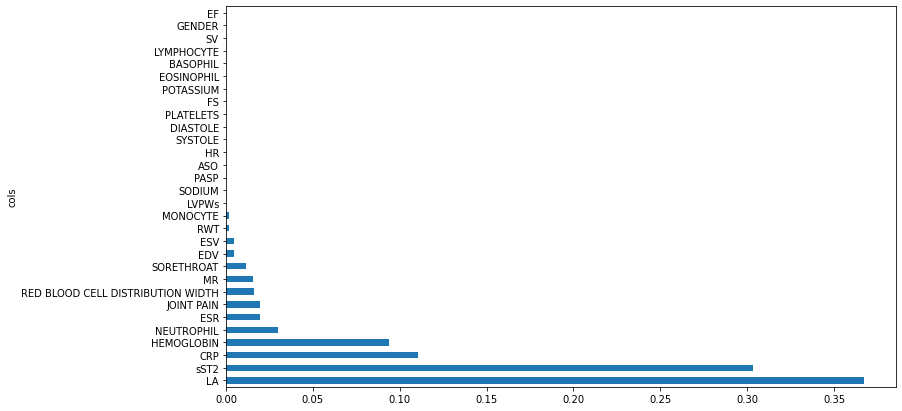

In [41]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [42]:
(accuracy,precision,recall,f1) = get_metrics(m,valid_xs,valid_y)

In [43]:
(accuracy,precision,recall,f1)

(1.0, 1.0, 1.0, 1.0)

In [46]:
group_one_and_three = df[(df['GROUP'] == 'GROUP I (PHARYNGITIS)') | (df['GROUP'] == 'GROUP III (RHD)')]

In [47]:
group_one_and_three.head()

,AGE,GENDER,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,RWT,PASP,PAH,CONC,MR,AR,TR,PR,PE,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,SYSTOLE,DIASTOLE,HR,DOE I - II,DOE III - IV,FEVER,COLD & COUGH,SORETHROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDMA,sST2,GROUP
181,26,F,4.9,2.3,4.7,3.6,0.7,1.0,0.8,1.0,58,29,24,50,25,0.30,79,SEVERE,NO,SEVERE,MILD,SEVERE,NIL,TRACE,400,71,59.40,10.9,10.3,523000,85.3,2.8,1.0,27.8,12.4,137,4.0,120,80,60,NO,YES,YES,YES,NO,YES,YES,YES,NO,NO,32.4,GROUP III (RHD)
3,11,M,3.1,2.4,3.5,2.4,1.0,1.2,1.0,1.2,60,30,33,52,19,0.57,42,MILD,NO,NIL,NIL,TRIVIAL,NIL,NIL,800,33,0.00,13.2,13.0,345000,52.6,2.8,1.0,20.0,6.3,136,4.0,120,80,58,NO,YES,YES,NO,YES,NO,NO,YES,NO,NO,15.2,GROUP I (PHARYNGITIS)
115,61,F,4.2,2.0,3.6,2.9,0.7,1.3,0.8,1.2,60,30,90,53,34,0.39,43,MILD,NO,SEVERE,NIL,SEVERE,MILD,NIL,0,0,0.00,12.2,11.5,480000,90.9,0.0,0.8,41.2,3.3,140,4.3,130,90,125,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,22.0,GROUP III (RHD)
170,68,F,4.6,3.5,4.5,2.6,1.2,1.4,1.2,1.5,60,30,55,96,41,0.53,38,MILD,YES,MILD,MILD,MILD,MILD,TRACE,800,86,139.97,10.9,15.2,522000,74.2,0.2,0.1,28.4,9.9,134,4.9,120,80,90,NO,NO,YES,YES,NO,NO,YES,NO,NO,NO,22.4,GROUP III (RHD)
141,38,F,3.1,2.6,4.0,2.7,0.7,0.9,0.7,0.9,65,35,79,103,24,0.35,40,MILD,NO,MILD,NIL,MILD,NIL,NIL,800,81,53.00,9.9,12.0,598000,91.6,16.3,0.0,17.4,10.2,139,4.1,100,60,80,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,22.0,GROUP III (RHD)


In [48]:
len(group_one_and_three)

138

In [49]:
procs = [Categorify, FillMissing]
N = len(group_one_and_three)
train_n = int( 0.70 * N )
test_n = N - train_n
train_n,test_n

(96, 42)

In [50]:
splits= (list(range(train_n)),list(range(train_n,N)))

In [51]:
to = TabularPandas(group_one_and_three, procs, cat, cont, y_names=dependant_variable,y_block=CategoryBlock(), splits=splits)



In [52]:
to.show(3)

,GENDER,PAH,CONC,MR,AR,TR,PR,PE,DOE I - II,DOE III - IV,FEVER,COLD & COUGH,SORETHROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDMA,AGE,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,RWT,PASP,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,SYSTOLE,DIASTOLE,HR,sST2,GROUP
181,F,SEVERE,NO,SEVERE,MILD,SEVERE,NIL,TRACE,NO,YES,YES,YES,NO,YES,YES,YES,NO,NO,26,4.9,2.3,4.7,3.6,0.7,1.0,0.8,1.0,58,29,24,50,25,0.30,79,400,71,59.400002,10.9,10.3,523000,85.300003,2.8,1.0,27.799999,12.4,137,4.0,120,80,60,32.400002,GROUP III (RHD)
3,M,MILD,NO,NIL,NIL,TRIVIAL,NIL,NIL,NO,YES,YES,NO,YES,NO,NO,YES,NO,NO,11,3.1,2.4,3.5,2.4,1.0,1.2,1.0,1.2,60,30,33,52,19,0.57,42,800,33,0.000000,13.2,13.0,345000,52.599998,2.8,1.0,20.000000,6.3,136,4.0,120,80,58,15.200000,GROUP I (PHARYNGITIS)
115,F,MILD,NO,SEVERE,NIL,SEVERE,MILD,NIL,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,61,4.2,2.0,3.6,2.9,0.7,1.3,0.8,1.2,60,30,90,53,34,0.39,43,0,0,0.000000,12.2,11.5,480000,90.900002,0.0,0.8,41.200001,3.3,140,4.3,130,90,125,22.000000,GROUP III (RHD)


In [53]:
len(to)

138

In [54]:
len(to.train),len(to.valid)


(96, 42)

In [55]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [61]:
def rf(xs, y, n_estimators=40, max_samples=20,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [62]:
m = rf(xs, y);
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
50,sST2,0.501550
19,LA,0.247343
18,AGE,0.050000
37,HEMOGLOBIN,0.046699
4,AR,0.039425
46,POTASSIUM,0.034926
12,SORETHROAT,0.025000
3,MR,0.025000
48,DIASTOLE,0.023450
28,FS,0.003070


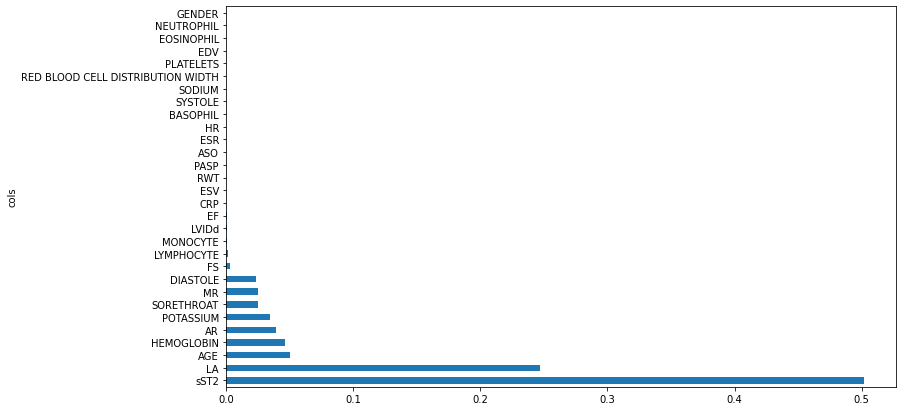

In [63]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [64]:
(accuracy,precision,recall,f1) = get_metrics(m,valid_xs,valid_y)
(accuracy,precision,recall,f1)

(1.0, 1.0, 1.0, 1.0)

In [72]:
group_two_and_three = df[(df['GROUP'] == 'GROUP III (RHD)') | (df['GROUP'] == 'GROUP II (RF)')]

In [73]:
group_two_and_three.head()

,AGE,GENDER,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,RWT,PASP,PAH,CONC,MR,AR,TR,PR,PE,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,SYSTOLE,DIASTOLE,HR,DOE I - II,DOE III - IV,FEVER,COLD & COUGH,SORETHROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDMA,sST2,GROUP
181,26,F,4.9,2.3,4.7,3.6,0.7,1.0,0.8,1.0,58,29,24,50,25,0.30,79,SEVERE,NO,SEVERE,MILD,SEVERE,NIL,TRACE,400,71,59.40,10.9,10.3,523000,85.3,2.8,1.0,27.8,12.4,137,4.0,120,80,60,NO,YES,YES,YES,NO,YES,YES,YES,NO,NO,32.4,GROUP III (RHD)
64,28,F,3.8,2.3,4.9,3.1,1.1,1.3,1.1,1.3,63,33,41,119,78,0.45,22,NIL,NO,SEVERE,SEVERE,TRIVIAL,TRIVIAL,NIL,1600,39,64.20,11.8,10.0,396000,81.7,1.5,0.1,27.3,2.0,140,3.7,120,70,70,NO,NO,YES,YES,NO,YES,YES,YES,YES,YES,28.2,GROUP II (RF)
115,61,F,4.2,2.0,3.6,2.9,0.7,1.3,0.8,1.2,60,30,90,53,34,0.39,43,MILD,NO,SEVERE,NIL,SEVERE,MILD,NIL,0,0,0.00,12.2,11.5,480000,90.9,0.0,0.8,41.2,3.3,140,4.3,130,90,125,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,22.0,GROUP III (RHD)
170,68,F,4.6,3.5,4.5,2.6,1.2,1.4,1.2,1.5,60,30,55,96,41,0.53,38,MILD,YES,MILD,MILD,MILD,MILD,TRACE,800,86,139.97,10.9,15.2,522000,74.2,0.2,0.1,28.4,9.9,134,4.9,120,80,90,NO,NO,YES,YES,NO,NO,YES,NO,NO,NO,22.4,GROUP III (RHD)
105,18,F,3.6,2.6,4.1,2.4,0.9,1.0,1.0,1.2,60,30,80,141,61,0.44,22,NIL,NO,MILD,NIL,TRIVIAL,NIL,NIL,800,61,23.40,9.2,8.7,451000,67.3,1.6,0.0,31.3,2.0,141,4.3,120,70,74,NO,NO,YES,YES,YES,NO,NO,NO,NO,NO,20.7,GROUP II (RF)


In [74]:
len(group_two_and_three)

130

In [75]:
group_two_and_three = group_two_and_three.reindex(np.random.permutation(group_two_and_three.index))

In [76]:
group_two_and_three.head()

,AGE,GENDER,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,RWT,PASP,PAH,CONC,MR,AR,TR,PR,PE,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,SYSTOLE,DIASTOLE,HR,DOE I - II,DOE III - IV,FEVER,COLD & COUGH,SORETHROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDMA,sST2,GROUP
152,32,F,4.0,2.9,4.9,3.1,0.9,1.1,0.9,1.2,58,29,53,104,51,0.37,61,MODERATE,NO,MILD,MILD,MILD,MILD,NIL,0,0,45.6,12.1,11.2,400000,89.1,10.8,0.6,48.0,4.9,137,3.2,120,70,66,NO,YES,NO,NO,NO,YES,NO,YES,NO,NO,32.1,GROUP III (RHD)
121,55,M,4.2,2.6,4.6,2.9,1.1,1.3,1.1,1.3,56,28,40,96,56,0.48,55,MODERATE,NO,NIL,MILD,SEVERE,NIL,NIL,0,0,0.0,11.4,10.8,412000,53.5,12.6,0.3,47.0,6.6,145,4.3,120,70,118,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,33.0,GROUP III (RHD)
143,39,F,4.1,2.4,3.7,2.6,1.3,1.4,1.2,1.3,60,30,34,59,25,0.70,31,NIL,YES,MILD,MILD,MILD,NIL,NIL,0,0,59.0,12.9,10.0,415000,80.7,15.7,1.0,17.0,4.6,139,3.9,120,70,62,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,22.7,GROUP III (RHD)
81,11,M,4.0,2.8,4.1,3.4,1.1,1.3,1.1,1.3,70,35,45,101,56,0.54,36,MILD,NO,MODERATE,MODERATE,TRIVIAL,NIL,TRACE,1600,51,65.0,9.9,11.1,352000,80.1,4.2,0.0,31.8,8.0,143,4.3,110,70,65,YES,NO,YES,YES,NO,YES,NO,NO,YES,NO,20.9,GROUP II (RF)
62,16,F,3.6,2.9,4.9,3.1,0.9,1.0,0.9,1.0,65,35,44,114,70,0.37,39,MILD,NO,SEVERE,MILD,TRIVIAL,TRIVIAL,NIL,800,49,69.0,10.6,8.6,660000,82.1,4.3,0.0,21.0,2.0,138,3.7,100,60,70,NO,YES,YES,NO,YES,NO,NO,NO,YES,NO,27.1,GROUP II (RF)


In [79]:
procs = [Categorify, FillMissing]
N = len(group_two_and_three)
train_n = int( 0.70 * N )
test_n = N - train_n
train_n,test_n

(91, 39)

In [80]:
splits= (list(range(train_n)),list(range(train_n,N)))

In [81]:
to = TabularPandas(group_two_and_three, procs, cat, cont, y_names=dependant_variable,y_block=CategoryBlock(), splits=splits)


In [82]:
len(to)

130

In [83]:
len(to.train),len(to.valid)


(91, 39)

In [84]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [87]:
def rf(xs, y, n_estimators=40, max_samples=50,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [88]:
m = rf(xs, y);
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
34,ASO,0.386091
18,AGE,0.355007
27,EF,0.064885
41,EOSINOPHIL,0.046268
44,MONOCYTE,0.034740
36,CRP,0.033610
50,sST2,0.019285
14,JOINT PAIN,0.019251
39,PLATELETS,0.011070
4,AR,0.008553


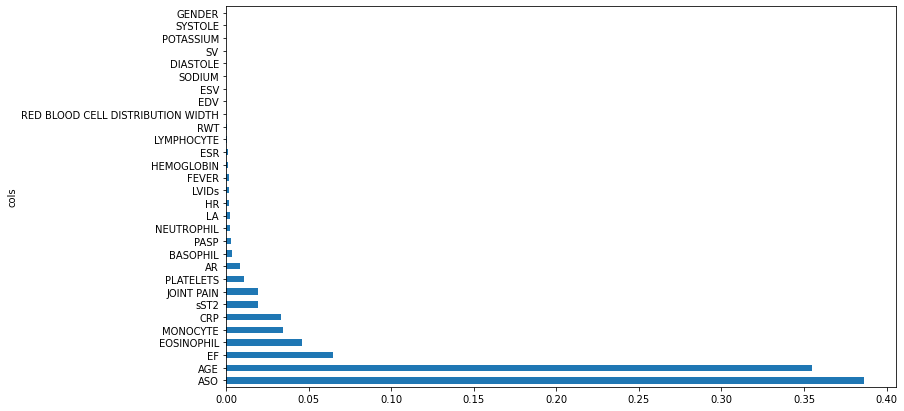

In [89]:
plot_fi(fi[:30]);

In [90]:
(accuracy,precision,recall,f1) = get_metrics(m,valid_xs,valid_y)
(accuracy,precision,recall,f1)

(1.0, 1.0, 1.0, 1.0)

In [ ]:
# Every metric is 1.0
